In [54]:
import os
os.chdir("D:\PycharmProjects\MachineLearning")
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from seaborn import pairplot


In [45]:
df = pd.read_csv('Data_lab3.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.replace(',', '.', regex=True, inplace=True)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t36     29 non-null     float64
 1   t35     29 non-null     float64
 2   t34     29 non-null     float64
 3   t33     29 non-null     float64
 4   t32     29 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


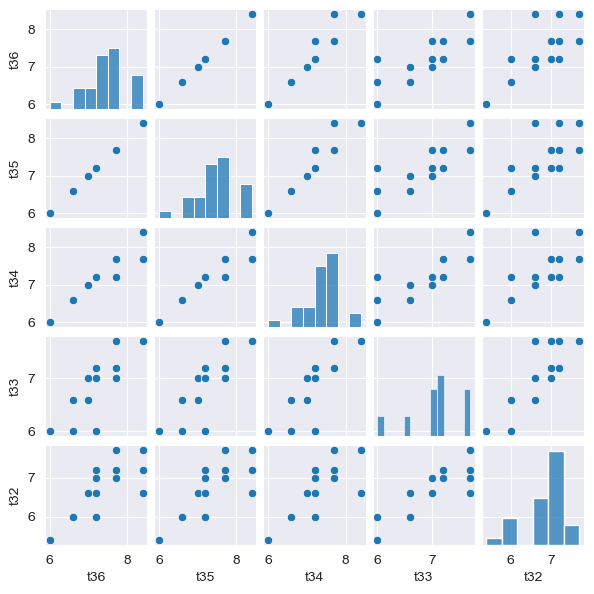

In [46]:
# 1. Побудуйте матрицю діаграм розсіювання
pairplot(df, height=1.2)

На основі матриці діаграм розсіювання поки складно виділити кластери та їхню кількість.

<Axes: >

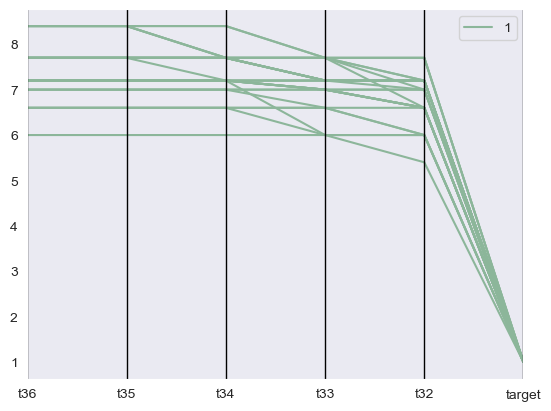

In [47]:
#2. Графік  паралельних координат
df_copy = df
df_copy['target'] = 1
columns = df_copy.columns
parallel_coordinates(df, 'target', cols=columns)

Тут попередньо можна виділити 2 кластери - об'єкти, у яких спостережується початок спаду з першого замірювання та 
об'єкти у яких до заміру з температурою 34-32 не було спаду показника

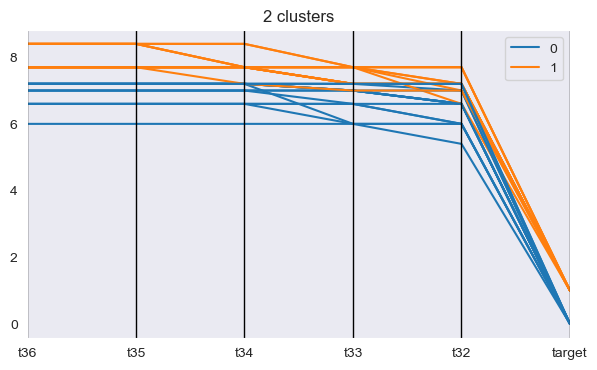

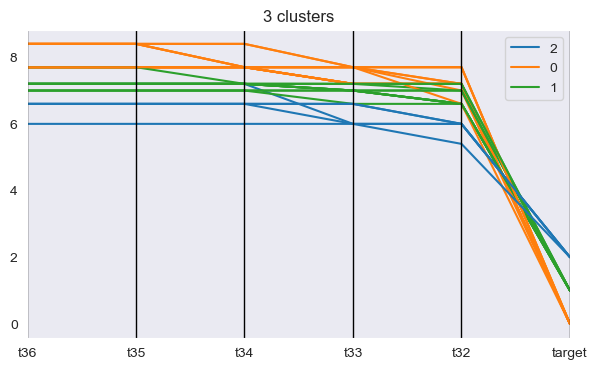

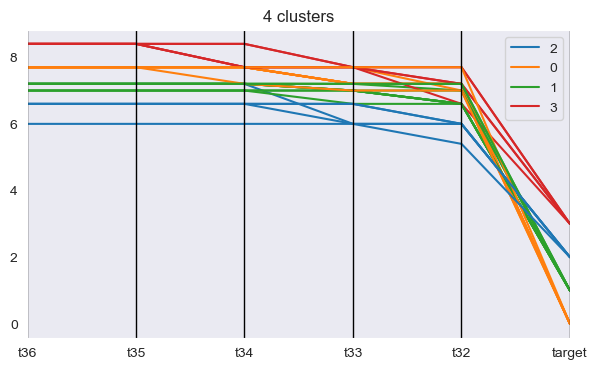

In [48]:
#3. Розбийте пацієнтів на кластери за допомогою алгоритму k-середніх
clusters = []
silhouette_indexes, calinski_harabasz_indexes, davies_bouldin_indexes  = [], [], []
for cluster_num in range(2, 5):
    kmeans = KMeans(n_clusters=cluster_num, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_indexes.append(silhouette_score(df, labels))
    calinski_harabasz_indexes.append(calinski_harabasz_score(df, labels))
    davies_bouldin_indexes.append(davies_bouldin_score(df, labels))
    clusters.append(cluster_num)
    df['target'] = labels
    plt.figure(figsize=(7, 4))
    parallel_coordinates(df, 'target', cols=df.columns, color=plt.cm.tab10.colors)
    plt.title(f'{cluster_num} clusters')
    plt.show()
    df.drop(columns='target', inplace=True)

Судячи з цих 3 варіантів, на мій погляд 3 кластери є оптимальним варіантом, бо ми бачимо, що першу групу утворюють 
об'єкти, у яких спад показника почався вже при температурі 35, другу групу - об'єкти, у яких спад почався на 
температурі 34-33, і третю групу - об'єкти, у багатьох з яких спаду не відбулося.

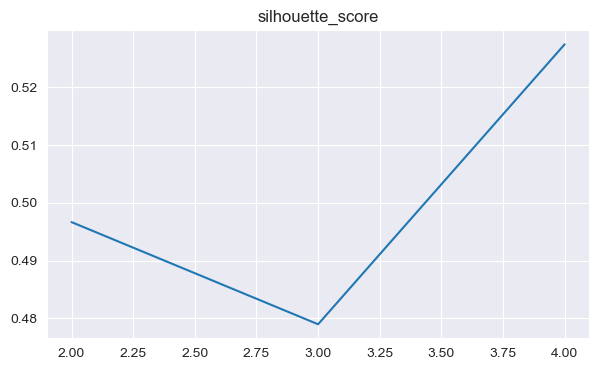

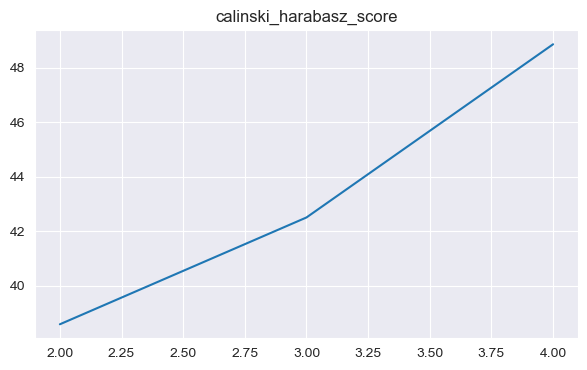

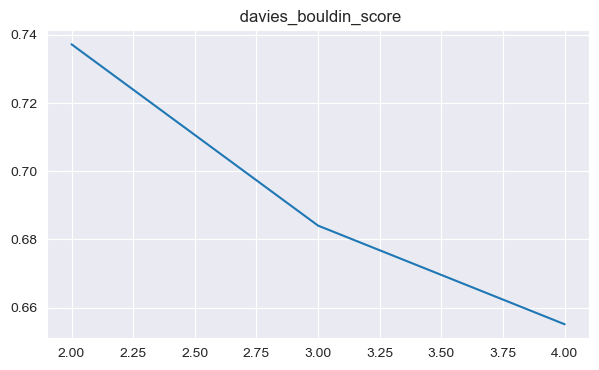

In [49]:
#4. Оцініть оптимальну кількість кластерів для алгоритму k-середніх на основі індексу якості кластеризації
plt.figure(figsize=(7, 4))
plt.title('silhouette_score')
plt.plot(clusters, silhouette_indexes)
plt.show()
plt.figure(figsize=(7, 4))
plt.title('calinski_harabasz_score')
plt.plot(clusters, calinski_harabasz_indexes)
plt.show()
plt.figure(figsize=(7, 4))
plt.title(' davies_bouldin_score')
plt.plot(clusters, davies_bouldin_indexes)
plt.show()
clusters.clear()
silhouette_indexes.clear()
calinski_harabasz_indexes.clear()
davies_bouldin_indexes.clear()

Всі 3 метрики вимірювання якості схиляються до того, що 4 - оптимальна кількість кластерів для цього набору даних. На
 мій погляд, все ж 3 кластери більше підходять

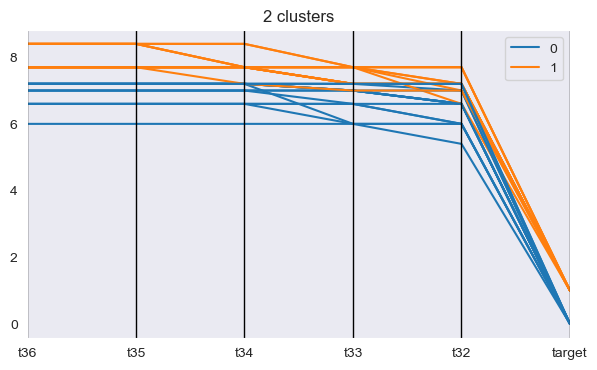

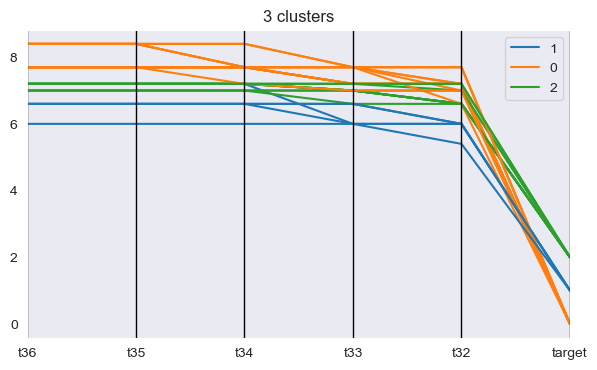

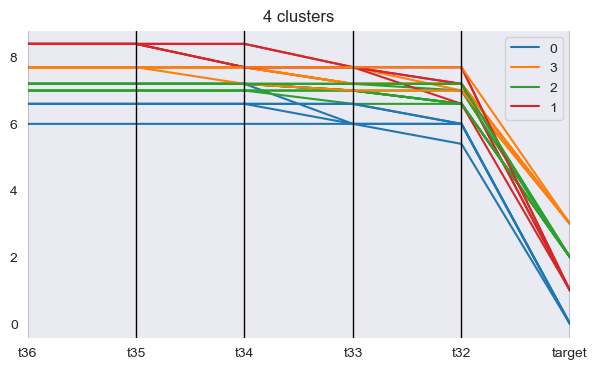

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [25.0, 25.0, 44.6875, 44.6875],
  [10.0, 10.0, 34.84375, 34.84375],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [95.0, 95.0, 113.75, 113.75],
  [22.421875, 22.421875, 104.375, 104.375],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [192.5, 192.5, 222.5, 222.5],
  [160.0, 160.0, 207.5, 207.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [183.75, 183.75, 254.375, 254.375],
  [63.3984375, 63.3984375, 219.0625, 219.0625]],
 'dcoord': [[0.0, 0.7000000000000002, 0.7000000000000002, 0.0],
  [0.0,

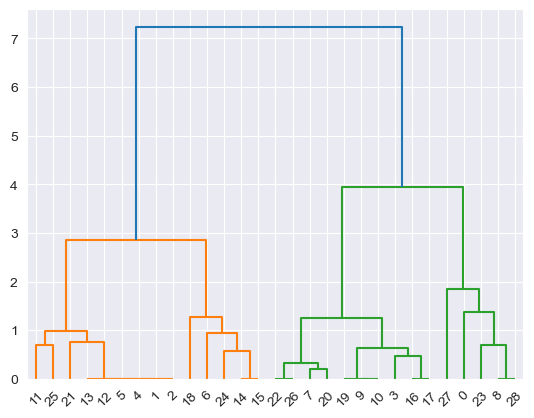

In [50]:
#5. Розбийте пацієнтів на 2, 3, 4 кластери за допомогою ієрархічного алгоритму кластеризації
for cluster_num in range(2, 5):
    agglomerative = AgglomerativeClustering(n_clusters=cluster_num, linkage='ward')
    agglomerative.fit(df)
    labels = agglomerative.labels_
    silhouette_indexes.append(silhouette_score(df, labels))
    calinski_harabasz_indexes.append(calinski_harabasz_score(df, labels))
    davies_bouldin_indexes.append(davies_bouldin_score(df, labels))
    clusters.append(cluster_num)
    df['target'] = labels
    plt.figure(figsize=(7, 4))
    plt.title(f'{cluster_num} clusters')
    parallel_coordinates(df, 'target', cols=df.columns, color=plt.cm.tab10.colors)
    plt.show()
    df.drop(columns='target', inplace=True)
dendrogram(linkage(df, method='ward'))

Аналізуючи дендрограму, я тепер також більше схиляюсь до того, що дані утворюють 4 кластери

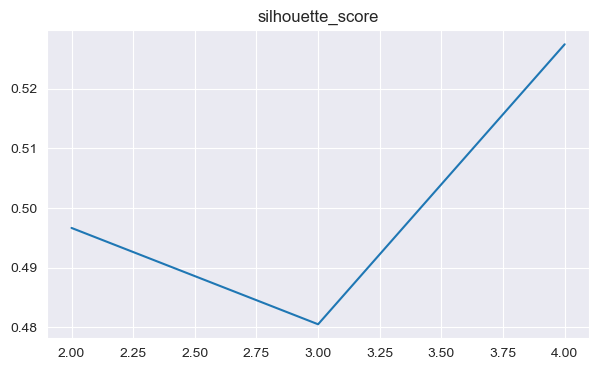

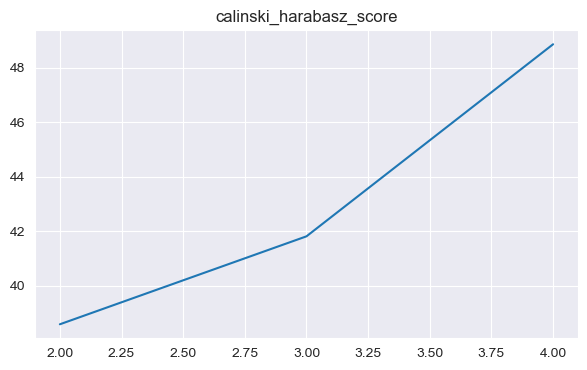

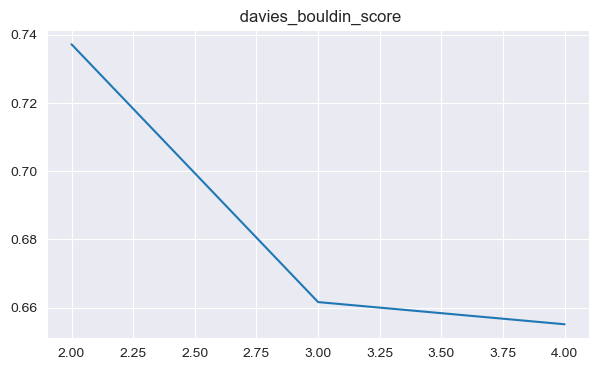

In [51]:
#6. Оцініть оптимальну кількість кластерів для ієрархічної кластеризації на основі індексу якості кластеризації
plt.figure(figsize=(7, 4))
plt.title('silhouette_score')
plt.plot(clusters, silhouette_indexes)
plt.show()
plt.figure(figsize=(7, 4))
plt.title('calinski_harabasz_score')
plt.plot(clusters, calinski_harabasz_indexes)
plt.show()
plt.figure(figsize=(7, 4))
plt.title(' davies_bouldin_score')
plt.plot(clusters, davies_bouldin_indexes)
plt.show()

Результати індексів для ієрархічної кластеризації якості дублюють результати для KMeans і дендрограму, говорячи, що 4
 є оптимальною кількістю кластерів

In [75]:
#7. Порівняйте розбиття, одержані алгоритмом k-середніх та ієрархічним
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
kmeans.fit(df)
labels1 = kmeans.labels_
print("KMeans:")
print(f"Silhouette: {silhouette_score(df, labels1)}")
print(f"Calinski-Harabasz: {calinski_harabasz_score(df, labels1)}")
print(f"Davies-Bouldin: {davies_bouldin_score(df, labels1)}")
agglomerative.fit(df)
labels2 = agglomerative.labels_
print("Hierarchical:")
print(f"Silhouette: {silhouette_score(df, labels2)}")
print(f"Calinski-Harabasz: {calinski_harabasz_score(df, labels2)}")
print(f"Davies-Bouldin: {davies_bouldin_score(df, labels2)}")
print("Rand Index:")
print(adjusted_rand_score(labels1, labels2))

KMeans:
Silhouette: 0.527465314318804
Calinski-Harabasz: 48.8534110489481
Davies-Bouldin: 0.6551526245205095
Hierarchical:
Silhouette: 0.527465314318804
Calinski-Harabasz: 48.8534110489481
Davies-Bouldin: 0.6551526245205095
Rand Index:
1.0


Як ми бачимо, результати розбиття двох моделей кластеризації ідентичні, про що свідчать однакові індекси оцінок 
якості, а також значення Rand Index, яке дорівнює 1.